[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/witchapong/build-ai-based-applications/blob/main/vision/1_image_classification_fastai.ipynb)

# Image Classification
In this notebook, we'll learn how to build a deep learning (ML) model for classifying food images. We'll use [fastai](https://docs.fast.ai/) which is a convenient high-level AI/ML toolkit built on top of [Pytorch](https://pytorch.org/), one of the two most popular frameworks for building Neural Network based ML model developed by Facebook (the other one is [TensorFlow](https://www.tensorflow.org/api_docs) by Google).

In [1]:
# install Kaggle's API
!pip install kaggle
# download dataset from Kaggle
!kaggle datasets download harishkumardatalab/food-image-classification-dataset
# unzip image data
!unzip food-image-classification-dataset.zip -d data

Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/food-image-classification-dataset
License(s): CC0-1.0
 99%|██████████████████████████████████████▊| 1.67G/1.68G [00:14<00:00, 168MB/s]
100%|███████████████████████████████████████| 1.68G/1.68G [00:14<00:00, 121MB/s]


In [3]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

from path import Path

# Explore label

In [4]:
# read all image directories into a DataFrame
img_df = pd.DataFrame({"image_path":glob("data/Food Classification dataset/*/*")})
img_df["label"] = img_df["image_path"].apply(lambda x: x.split("/")[2])
img_df = img_df[["image_path", "label"]]

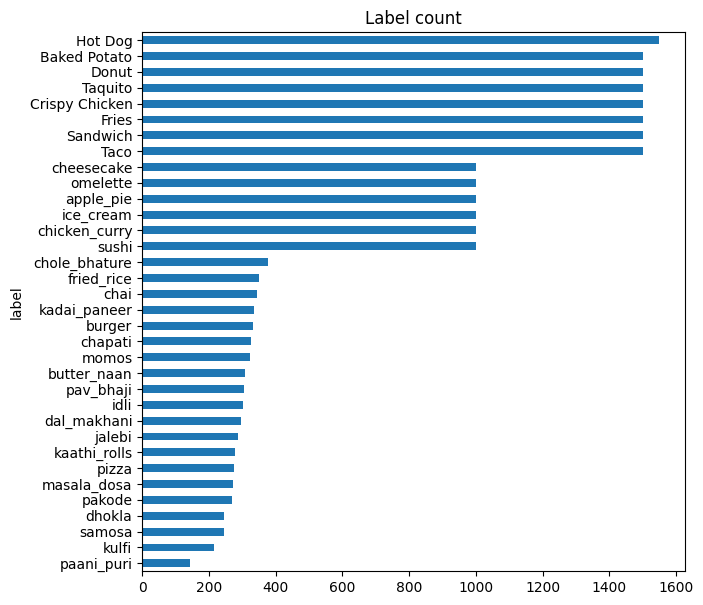

In [5]:
_ = img_df["label"].value_counts(ascending=True).plot(kind="barh", figsize=(7,7))
_ = plt.title("Label count")

# Split data

In [6]:
# separate train & test data >> let's split 10% of each class for testing
train_img_df, test_img_df = train_test_split(img_df, test_size=.1, stratify=img_df["label"])

In [7]:
train_img_df["label"].value_counts(normalize=True)

label
Hot Dog           0.064836
Fries             0.062835
Donut             0.062835
Crispy Chicken    0.062835
Sandwich          0.062835
Taco              0.062835
Taquito           0.062835
Baked Potato      0.062835
apple_pie         0.041890
cheesecake        0.041890
chicken_curry     0.041890
omelette          0.041890
ice_cream         0.041890
sushi             0.041890
chole_bhature     0.015732
fried_rice        0.014661
chai              0.014429
kadai_paneer      0.014010
burger            0.013870
chapati           0.013684
momos             0.013544
butter_naan       0.012846
pav_bhaji         0.012753
idli              0.012660
dal_makhani       0.012334
jalebi            0.012055
kaathi_rolls      0.011683
pizza             0.011496
masala_dosa       0.011450
pakode            0.011264
dhokla            0.010240
samosa            0.010240
kulfi             0.008983
paani_puri        0.006051
Name: proportion, dtype: float64

In [8]:
test_img_df["label"].value_counts(normalize=True)

label
Hot Dog           0.064908
Sandwich          0.062814
Taquito           0.062814
Fries             0.062814
Crispy Chicken    0.062814
Taco              0.062814
Donut             0.062814
Baked Potato      0.062814
ice_cream         0.041876
chicken_curry     0.041876
sushi             0.041876
cheesecake        0.041876
omelette          0.041876
apple_pie         0.041876
chole_bhature     0.015913
fried_rice        0.014657
chai              0.014238
burger            0.013819
chapati           0.013819
kadai_paneer      0.013819
momos             0.013400
butter_naan       0.012982
pav_bhaji         0.012982
dal_makhani       0.012563
idli              0.012563
jalebi            0.012144
pizza             0.011725
kaathi_rolls      0.011725
pakode            0.011307
masala_dosa       0.011307
dhokla            0.010469
samosa            0.010050
kulfi             0.008794
paani_puri        0.005863
Name: proportion, dtype: float64

# Train model

In [9]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 483.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 343.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.8 MB/s eta 0:00:00


In [10]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
   get_x=ColReader("image_path"),
   get_y=ColReader("label"),
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # GrandparentSplitter(valid_name='validation')
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [11]:
dls = fields.dataloaders(train_img_df)

In [12]:
dls.vocab

['Baked Potato', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Sandwich', 'Taco', 'Taquito', 'apple_pie', 'burger', 'butter_naan', 'chai', 'chapati', 'cheesecake', 'chicken_curry', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice', 'ice_cream', 'idli', 'jalebi', 'kaathi_rolls', 'kadai_paneer', 'kulfi', 'masala_dosa', 'momos', 'omelette', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa', 'sushi']

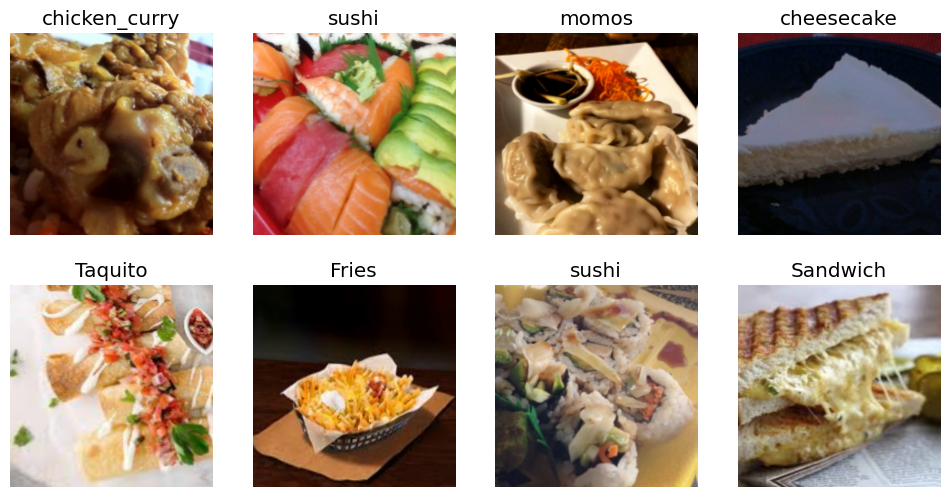

In [13]:
dls.train.show_batch(max_n=8, nrows=2)

In [14]:
learner = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 176MB/s]


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full con

SuggestedLRs(valley=0.0008317637839354575)

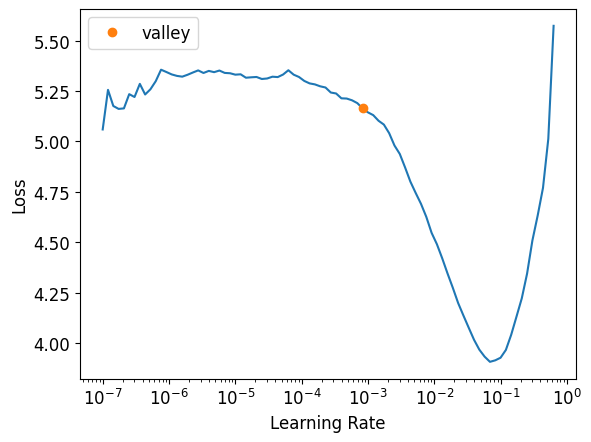

In [15]:
learner.lr_find() # หา learning rate ที่เหมาะสม

In [16]:
learner.fine_tune(epochs=6, freeze_epochs=1, base_lr=0.0012)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.690660,0.925699,0.271119,0.728881,01:38


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.979508,0.595948,0.178497,0.821503,02:09
1,0.703426,0.479480,0.144985,0.855015,02:08
2,0.482999,0.406074,0.123575,0.876425,02:09
3,0.377914,0.375370,0.111008,0.888992,02:09
4,0.258752,0.346960,0.106819,0.893181,02:08
5,0.224338,0.343332,0.105655,0.894345,02:08


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in by

# Evaluation

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


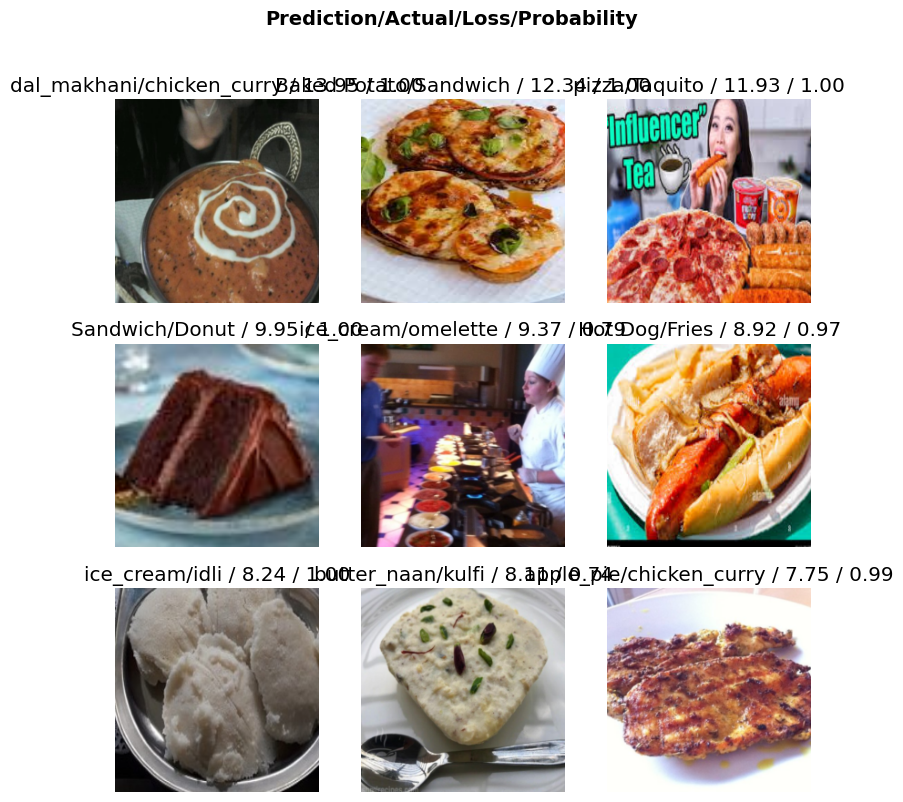

In [17]:
interp = Interpretation.from_learner(learner)
interp.plot_top_losses(9)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


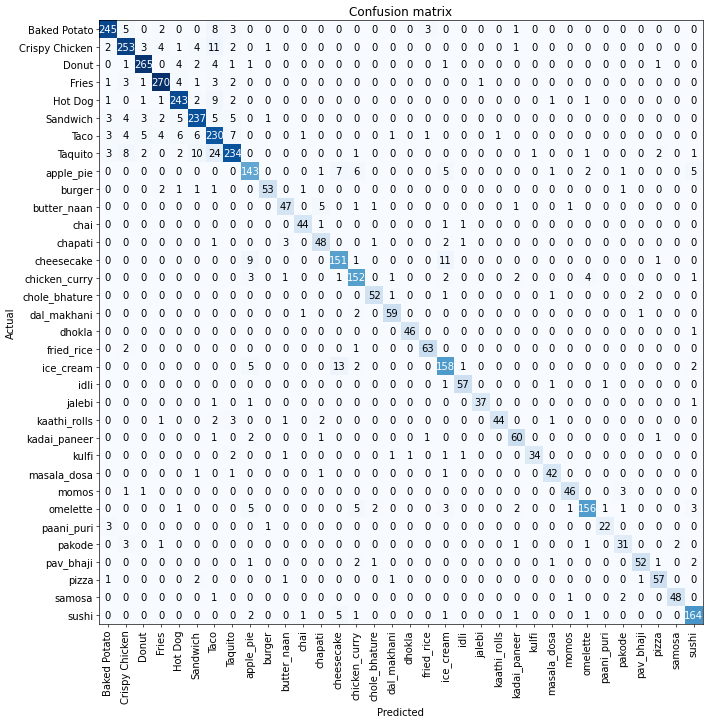

In [18]:
clf_interp = ClassificationInterpretation.from_learner(learner)
clf_interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [19]:
clf_interp.most_confused(min_val=5)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[('Taquito', 'Taco', 24),
 ('ice_cream', 'cheesecake', 13),
 ('Crispy Chicken', 'Taco', 11),
 ('cheesecake', 'ice_cream', 11),
 ('Taquito', 'Sandwich', 10),
 ('Hot Dog', 'Taco', 9),
 ('cheesecake', 'apple_pie', 9),
 ('Baked Potato', 'Taco', 8),
 ('Taquito', 'Crispy Chicken', 8),
 ('Taco', 'Taquito', 7),
 ('apple_pie', 'cheesecake', 7),
 ('Taco', 'Hot Dog', 6),
 ('Taco', 'Sandwich', 6),
 ('apple_pie', 'chicken_curry', 6),
 ('Baked Potato', 'Crispy Chicken', 5),
 ('Sandwich', 'Hot Dog', 5),
 ('Sandwich', 'Taco', 5),
 ('Sandwich', 'Taquito', 5),
 ('Taco', 'Donut', 5),
 ('apple_pie', 'ice_cream', 5),
 ('apple_pie', 'sushi', 5),
 ('butter_naan', 'chapati', 5),
 ('ice_cream', 'apple_pie', 5),
 ('omelette', 'apple_pie', 5),
 ('omelette', 'chicken_curry', 5),
 ('sushi', 'cheesecake', 5)]

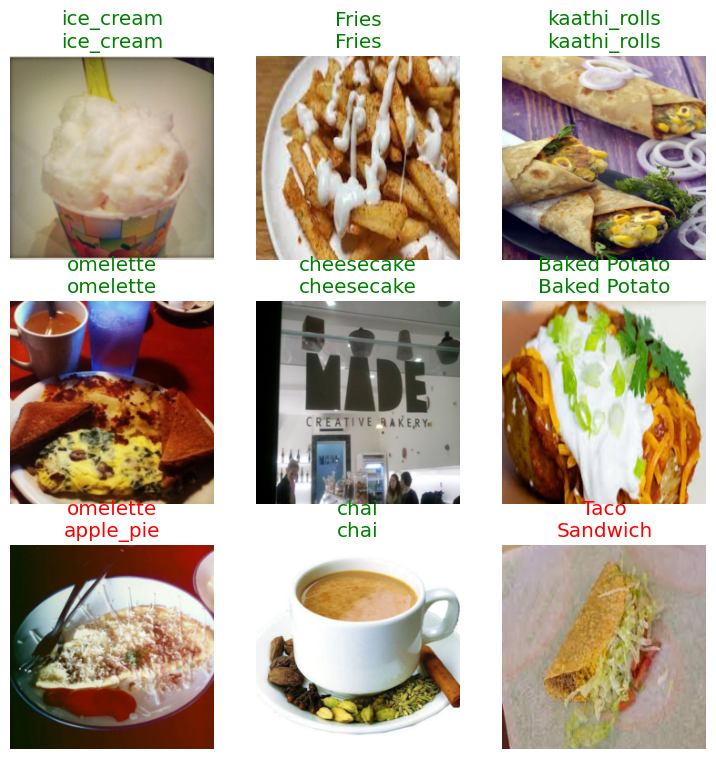

In [20]:
learner.show_results(shuffle=True)

chapati


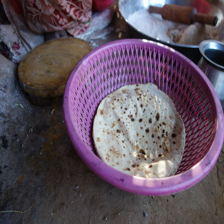

In [21]:
rand_img = test_img_df.sample(1)
rand_img_path = rand_img["image_path"].values[0]
rand_img_label = rand_img["label"].values[0]

print(rand_img_label)
Image.open(rand_img_path).resize((224, 224))

In [22]:
learner.predict(rand_img_path)

('chapati',
 tensor(12),
 tensor([5.2792e-06, 6.3813e-08, 4.4532e-05, 1.4337e-06, 2.3908e-08, 2.8358e-06, 2.8973e-07, 3.2123e-08, 7.3648e-04, 1.8129e-06, 9.3872e-03, 3.7939e-03, 7.9171e-01, 1.7287e-05, 1.6809e-04, 4.5517e-04,
         5.1984e-04, 9.0942e-06, 1.3731e-04, 1.7070e-01, 1.5607e-02, 5.5147e-06, 2.2944e-05, 5.4206e-05, 6.1193e-03, 2.2223e-06, 3.6710e-04, 5.1747e-05, 8.3021e-06, 1.7933e-05, 1.3630e-05, 7.4354e-06,
         4.8192e-06, 2.0188e-05]))